RANDOM FOREST

Birden fazla karar ağacının ürettiği tahminlerin biraraya getirilerek değerlendirilmesine dayanır.

Ağaç oluşturmada verisetinin 2/3'ü kullanılır. Dışarıda kalan veri, ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.

Random Forest, genellikle yüksek boyutlu ve karmaşık veri setlerinde iyi performans gösterir. Ayrıca, aşırı uydurmayı (overfitting) azaltmak için etkili bir yöntemdir.

In [1]:
# "Hitters" verisetini yüklüyoruz.
import pandas as pd
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df.head()

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Veriseti içindeki eksik verileri siliyoruz.
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
# Verisetini tanımak için incelemeler yapıyoruz.

In [4]:
# Verisetindeki sayısal sütunlar için istatistiksel özet bilgilerini inceliyoruz.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [5]:
# Veriseti içinde eksik değer kalıp kalmadığını inceliyoruz.
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [6]:
# Kategorik değişkenlerin dummy değişkenlere dönüştürülmesi işlemini gerçekleştiriyoruz.
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False


In [7]:
# Verisetindeki bağımlı ve bağımsız değişkenleri belirliyoruz.
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [9]:
# Verisetini train ve test setlerine ayırıyoruz.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Modeli oluşturduk ve eğittik.
model = RandomForestRegressor(random_state = 42)
rf_model = model.fit(X_train, y_train)

In [12]:
# Model üzerinde tahmin işlemini gerçekleştirdik.
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [13]:
# Eğitim ve Test Setleri için Hata Kareler Ortalamasının Karekökü değeri olan "RMSE" değerini hesapladık.
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Eğitim Seti RMSE Değeri:', rmse_train)
print('Test Seti RMSE Değeri:', rmse_test)

Eğitim Seti RMSE Değeri: 102.62642010226114
Test Seti RMSE Değeri: 344.8191624908484


Model Tuning

In [14]:
# Cross Validation (Çapraz Doğrulama) işlemini gerçekleştirmek için nesne oluşturuyoruz.
from sklearn.model_selection import GridSearchCV
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [16]:
# Cross Validation nesnesi oluşturduktan sonra modeli oluşturduk ve eğittik.
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1)
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [17]:
# Model için en iyi parametreler aşağıdaki gibidir.
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [18]:
# Final Modelini kuruyoruz.
rf_tuned = RandomForestRegressor(max_depth  = 8, max_features = 3, n_estimators =200)
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [19]:
# Final modeli üzerinde tahmin işlemini gerçekleştirdik.
y_pred_train = rf_tuned.predict(X_train)
y_pred_test = rf_tuned.predict(X_test)

In [20]:
# Model tuning işleminden sonra Hata Kareler Ortalamasının Karekökü değeri olan "RMSE" değerini tekrar hesapladık.
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test =np.sqrt(mean_squared_error(y_test, y_pred_test))

print('Eğitim Seti RMSE Değeri:', rmse_train)
print('Test Seti RMSE Değeri:', rmse_test)

Eğitim Seti RMSE Değeri: 105.62536523146221
Test Seti RMSE Değeri: 343.11261081217907


Text(0.5, 0, 'Değişken Önem Düzeyleri')

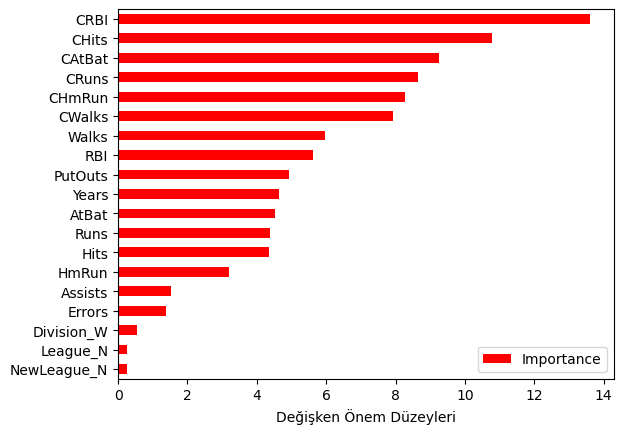

In [26]:
# Değişkenlerin önem düzeyini gösteriyoruz.
import matplotlib.pyplot as plt

Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

Özelliklerin önem sıralaması ne kadar yüksekse, model için o kadar önemli oldukları anlamına gelir. 